# Import Libraries

In [364]:
import pandas as pd
import fastai
from fastai import *
from fastai.tabular import *

# Define Variables

In [365]:
path = "/home/jupyter/study/kaggle/women-hack/"
output_path = path+"output/"
model_path = output_path+"models"
data = path+"data/"

# Initial Analysis

In [366]:
train_df = pd.read_csv(data+"train.csv")
test_df = pd.read_csv(data+"test.csv")

In [367]:
train_df

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107


In [368]:
train_df.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [369]:
test_df.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,35880.000000
mean,274566.035000,912.500000,300.500000,0.400000,0.010972,0.501667,0.072938
std,158083.869473,17.318343,173.207246,0.489905,0.104174,0.500004,0.099412
min,883.000000,883.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,137730.250000,897.750000,150.750000,0.000000,0.000000,0.000000,0.010000
50%,274761.500000,912.500000,300.500000,0.000000,0.000000,1.000000,0.034500
75%,410872.750000,927.250000,450.250000,1.000000,0.000000,1.000000,0.094000
max,548087.000000,942.000000,600.000000,1.000000,1.000000,1.000000,0.768000


# Preprocessing

## Feature Engineering

In [370]:
### Try creating day by 7 as a function

In [371]:
train_df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [372]:
## For short promotion, long promotion and public holiday, we can make variables stating the time since the 
## last event and the time until the next event.
## This will be done for each course_id

## Time till and Time after

In [373]:
train_df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [374]:
test_df["Sales"] = 0

In [375]:
test_df.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,35880.000000,36000.0
mean,274566.035000,912.500000,300.500000,0.400000,0.010972,0.501667,0.072938,0.0
std,158083.869473,17.318343,173.207246,0.489905,0.104174,0.500004,0.099412,0.0
min,883.000000,883.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,137730.250000,897.750000,150.750000,0.000000,0.000000,0.000000,0.010000,0.0
50%,274761.500000,912.500000,300.500000,0.000000,0.000000,1.000000,0.034500,0.0
75%,410872.750000,927.250000,450.250000,1.000000,0.000000,1.000000,0.094000,0.0
max,548087.000000,942.000000,600.000000,1.000000,1.000000,1.000000,0.768000,0.0


In [376]:
train_df = pd.concat([train_df, test_df])

In [377]:
train_df.reset_index(inplace= True)

In [378]:
train_df.describe()

,index,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,548087.000000,548087.000000,548087.000000,548087.000000,548087.000000,548087.000000,548087.000000,512087.000000,546203.000000,548087.000000
mean,240407.588104,274044.000000,466.286898,300.395678,0.381542,0.030282,0.489802,15375.101198,0.073318,112.890649
std,154602.660522,158219.232832,274.352901,173.355222,0.485765,0.171361,0.499896,7727.231205,0.100069,60.467897
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,101021.500000,137022.500000,229.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,78.000000
50%,238043.000000,274044.000000,457.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,107.000000
75%,375064.500000,411065.500000,711.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,143.000000
max,512086.000000,548087.000000,942.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [379]:
test_df.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,35880.000000,36000.0
mean,274566.035000,912.500000,300.500000,0.400000,0.010972,0.501667,0.072938,0.0
std,158083.869473,17.318343,173.207246,0.489905,0.104174,0.500004,0.099412,0.0
min,883.000000,883.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,137730.250000,897.750000,150.750000,0.000000,0.000000,0.000000,0.010000,0.0
50%,274761.500000,912.500000,300.500000,0.000000,0.000000,1.000000,0.034500,0.0
75%,410872.750000,927.250000,450.250000,1.000000,0.000000,1.000000,0.094000,0.0
max,548087.000000,942.000000,600.000000,1.000000,1.000000,1.000000,0.768000,0.0


### Functions

In [380]:
def get_elapsed(df, fld, pre):
    day1 = 0
    last_date = 0
    last_course = 0
    res = []

    for s,v,d in zip(df.Course_ID.values,df[fld].values, df.Day_No.values):
        if s != last_course:
            last_date = 0
            last_course = s
        if v: last_date = d
        res.append(d-last_date)
    df[pre+fld] = res
    
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

### Creating The fields

In [381]:
## Concatenate train and test together

In [382]:
sort_col = ["Course_ID", "Day_No"]

In [383]:
fld = "Public_Holiday"
train_df.sort_values(sort_col,inplace = True)
get_elapsed(train_df, fld, 'After_')
train_df.sort_values(sort_col,  ascending=[True, False], inplace= True)
get_elapsed(train_df, fld, 'Before_')
train_df.sort_values(sort_col,inplace = True)


In [384]:
fld = "Short_Promotion"
train_df.sort_values(sort_col,inplace = True)
get_elapsed(train_df, fld, 'After_')
train_df.sort_values(sort_col,  ascending=[True, False], inplace= True)
get_elapsed(train_df, fld, 'Before_')
train_df.sort_values(sort_col,inplace = True)


In [385]:
fld = "Long_Promotion"
train_df.sort_values(sort_col,inplace = True)
get_elapsed(train_df, fld, 'After_')
train_df.sort_values(sort_col,  ascending=[True, False], inplace= True)
get_elapsed(train_df, fld, 'Before_')
train_df.sort_values(sort_col,inplace = True)


In [386]:
display_all(train_df.head(1000))

,index,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,After_Public_Holiday,Before_Public_Holiday,After_Short_Promotion,Before_Short_Promotion,After_Long_Promotion,Before_Long_Promotion
0,0,1,1,1,Development,Course,0,1,1,11004.0,0.007,81,0,0,1,-6,0,0
1,1,2,2,1,Development,Course,0,0,1,13650.0,0.007,79,1,-86,2,-5,0,0
2,2,3,3,1,Development,Course,0,0,1,11655.0,0.007,75,2,-85,3,-4,0,0
3,3,4,4,1,Development,Course,0,0,1,12054.0,0.007,80,3,-84,4,-3,0,0
4,4,5,5,1,Development,Course,0,0,1,6804.0,0.007,41,4,-83,5,-2,0,0
5,5,6,6,1,Development,Course,0,0,1,10395.0,0.007,62,5,-82,6,-1,0,0
6,6,7,7,1,Development,Course,1,0,1,16023.0,0.007,122,6,-81,0,0,0,0
7,7,8,8,1,Development,Course,1,0,1,14385.0,0.007,114,7,-80,0,0,0,0
8,8,9,9,1,Development,Course,1,0,1,16485.0,0.007,121,8,-79,0,0,0,0
9,9,10,10,1,Development,Course,1,0,1,13377.0,0.007,100,9,-78,0,0,0,0


## Rolling Window Sums

In [387]:
train_df.set_index("Day_No", inplace = True)

In [388]:
columns = ['Short_Promotion', 'Public_Holiday', 'Long_Promotion']
bwd = train_df[['Course_ID']+columns].sort_index().groupby("Course_ID").rolling(7, min_periods=1).sum()
fwd = train_df[['Course_ID']+columns].sort_index(ascending=False).groupby("Course_ID").rolling(7, min_periods=1).sum()


In [389]:
display_all(train_df[['Course_ID']+columns].head(700))

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion
Day_No,,,,
1,1,0,1,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
5,1,0,0,1
6,1,0,0,1
7,1,1,0,1
8,1,1,0,1
9,1,1,0,1


In [390]:
display_all(bwd.head(700))

Course_ID  Short_Promotion  Public_Holiday  Long_Promotion
Course_ID Day_No                                                            
1         1             1.0              0.0             1.0             1.0
          2             2.0              0.0             1.0             2.0
          3             3.0              0.0             1.0             3.0
          4             4.0              0.0             1.0             4.0
          5             5.0              0.0             1.0             5.0
          6             6.0              0.0             1.0             6.0
          7             7.0              1.0             1.0             7.0
          8             7.0              2.0             0.0             7.0
          9             7.0              3.0             0.0             7.0
          10            7.0              4.0             0.0             7.0
          11            7.0              5.0             0.0             7.0
          12            7.0              5.0             0.0             7.0
          13            7.0              5.0             0.0             7.0
          14            7.0              4.0             0.0             7.0
          15            7.0              3.0             0.0             7.0
          16            7.0              2.0             0.0             7.0
          17            7.0              1.0             0.0             7.0
          18            7.0              0.0             0.0             7.0
          19            7.0              0.0             0.0             7.0
          20            7.0              0.0             0.0             7.0
          21            7.0              1.0             0.0             7.0
          22            7.0              2.0             0.0             7.0
          23            7.0              3.0             0.0             7.0
          24            7.0              4.0             0.0             7.0
          25            7.0              5.0             0.0             7.0
          26            7.0              5.0             0.0             7.0
          27            7.0              5.0             0.0             7.0
          28            7.0              4.0             0.0             7.0
          29            7.0              3.0             0.0             7.0
          30            7.0              2.0             0.0             7.0
          31            7.0              1.0             0.0             7.0
          32            7.0              0.0             0.0             7.0
          33            7.0              0.0             0.0             7.0
          34            7.0              0.0             0.0             7.0
          35            7.0              1.0             0.0             7.0
          36            7.0              2.0             0.0             7.0
          37            7.0              3.0             0.0             7.0
          38            7.0              4.0             0.0             7.0
          39            7.0              5.0             0.0             7.0
          40            7.0              5.0             0.0             7.0
          41            7.0              5.0             0.0             7.0
          42            7.0              4.0             0.0             7.0
          43            7.0              3.0             0.0             7.0
          44            7.0              2.0             0.0             7.0
          45            7.0              1.0             0.0             7.0
          46            7.0              0.0             0.0             7.0
          47            7.0              0.0             0.0             7.0
          48            7.0              0.0             0.0             7.0
          49            7.0              1.0             0.0             7.0
          50            7.0              2.0             0.0             7.0
          51  

In [391]:
display_all(fwd.head(900))

Course_ID  Short_Promotion  Public_Holiday  Long_Promotion
Course_ID Day_No                                                            
1         942           1.0              1.0             0.0             1.0
          941           2.0              2.0             0.0             2.0
          940           3.0              3.0             0.0             3.0
          939           4.0              4.0             0.0             4.0
          938           5.0              5.0             0.0             5.0
          937           6.0              5.0             0.0             6.0
          936           7.0              5.0             0.0             7.0
          935           7.0              4.0             0.0             7.0
          934           7.0              3.0             0.0             7.0
          933           7.0              2.0             0.0             7.0
          932           7.0              1.0             0.0             7.0
          931           7.0              0.0             0.0             7.0
          930           7.0              0.0             0.0             7.0
          929           7.0              0.0             0.0             7.0
          928           7.0              1.0             0.0             7.0
          927           7.0              2.0             0.0             7.0
          926           7.0              3.0             0.0             7.0
          925           7.0              4.0             0.0             7.0
          924           7.0              5.0             0.0             7.0
          923           7.0              5.0             0.0             7.0
          922           7.0              5.0             0.0             7.0
          921           7.0              4.0             0.0             7.0
          920           7.0              3.0             0.0             7.0
          919           7.0              2.0             0.0             7.0
          918           7.0              1.0             0.0             7.0
          917           7.0              0.0             0.0             7.0
          916           7.0              0.0             0.0             7.0
          915           7.0              0.0             0.0             7.0
          914           7.0              1.0             0.0             7.0
          913           7.0              2.0             0.0             7.0
          912           7.0              3.0             0.0             7.0
          911           7.0              4.0             0.0             7.0
          910           7.0              5.0             0.0             7.0
          909           7.0              5.0             0.0             7.0
          908           7.0              5.0             0.0             7.0
          907           7.0              4.0             0.0             7.0
          906           7.0              3.0             0.0             7.0
          905           7.0              2.0             0.0             7.0
          904           7.0              1.0             0.0             7.0
          903           7.0              0.0             0.0             7.0
          902           7.0              0.0             0.0             7.0
          901           7.0              0.0             0.0             7.0
          900           7.0              1.0             0.0             7.0
          899           7.0              2.0             0.0             7.0
          898           7.0              3.0             0.0             7.0
          897           7.0              4.0             0.0             7.0
          896           7.0              5.0             0.0             7.0
          895           7.0              5.0             0.0             7.0
          894           7.0              5.0             0.0             7.0
          893           7.0              4.0             0.0             7.0
          892 

In [392]:
bwd.drop('Course_ID',axis = 1,inplace=True)
bwd.reset_index(inplace=True)

fwd.drop('Course_ID',axis = 1,inplace=True)
fwd.reset_index(inplace=True)

In [393]:
train_df.reset_index(inplace=True)

In [394]:
train_df = train_df.merge(bwd, 'left', ['Day_No', 'Course_ID'], suffixes=['', '_bw'])
train_df = train_df.merge(fwd, 'left', ['Day_No', 'Course_ID'], suffixes=['', '_fw'])

In [395]:
train_df.drop(columns, axis = 1, inplace= True)

In [396]:
train_df.to_feather(output_path+"df")

In [397]:
train_df.Course_Domain.value_counts()

Development             282775
Software Marketing      178052
Finance & Accounting     82550
Business                  4710
Name: Course_Domain, dtype: int64

In [398]:
train_df.Course_Type.value_counts()

Course     281347
Program    264856
Degree       1884
Name: Course_Type, dtype: int64

In [399]:
display_all(train_df.Course_ID.value_counts().value_counts())
### There are cases where there are no courses for certain days.

942    506
758     93
941      1
Name: Course_ID, dtype: int64

## Missing Value Treatment

In [400]:
## Missing value only in the competition metric
## I guess it can be filled with 0 since If competition existed and was  significant would have been tracked

In [401]:
### Any Null value can be assumed to be 0?
train_df.isnull().sum()

Day_No                        0
index                         0
ID                            0
Course_ID                     0
Course_Domain                 0
Course_Type                   0
User_Traffic              36000
Competition_Metric         1884
Sales                         0
After_Public_Holiday          0
Before_Public_Holiday         0
After_Short_Promotion         0
Before_Short_Promotion        0
After_Long_Promotion          0
Before_Long_Promotion         0
Short_Promotion_bw            0
Public_Holiday_bw             0
Long_Promotion_bw             0
Short_Promotion_fw            0
Public_Holiday_fw             0
Long_Promotion_fw             0
dtype: int64

In [402]:
### Any Null value can be assumed to be 0?
test_df.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
Sales                   0
dtype: int64

In [403]:
train_df.Competition_Metric.fillna(0, inplace = True)
test_df.Competition_Metric.fillna(0, inplace = True)

## Train Val Test Split

### Saving train_df

In [404]:
train_df.to_feather(output_path+"processed_data")

In [405]:
df = pd.read_feather(output_path+"processed_data")

In [406]:
sel_columns = ["Day_No", "Course_ID", 'Course_Domain', 'Course_Type','Competition_Metric', 'Sales', 'After_Public_Holiday',
       'Before_Public_Holiday', 'After_Short_Promotion',
       'Before_Short_Promotion', 'After_Long_Promotion',
       'Before_Long_Promotion', 'Short_Promotion_bw', 'Public_Holiday_bw',
       'Long_Promotion_bw', 'Short_Promotion_fw', 'Public_Holiday_fw',
       'Long_Promotion_fw']


In [407]:
train_df.columns

Index(['Day_No', 'index', 'ID', 'Course_ID', 'Course_Domain', 'Course_Type',
       'User_Traffic', 'Competition_Metric', 'Sales', 'After_Public_Holiday',
       'Before_Public_Holiday', 'After_Short_Promotion',
       'Before_Short_Promotion', 'After_Long_Promotion',
       'Before_Long_Promotion', 'Short_Promotion_bw', 'Public_Holiday_bw',
       'Long_Promotion_bw', 'Short_Promotion_fw', 'Public_Holiday_fw',
       'Long_Promotion_fw'],
      dtype='object')

In [408]:
test_df = train_df.loc[train_df.Day_No >= 883]
train_df = train_df.loc[train_df.Day_No < 883]
train_df.reset_index(inplace = True)
val_df = train_df.loc[train_df.Day_No >= 823]

In [409]:
val_df.index.max()

512086

In [410]:
train_df.index.max()

512086

In [411]:
train_df.describe()

,level_0,Day_No,index,ID,Course_ID,User_Traffic,Competition_Metric,Sales,After_Public_Holiday,Before_Public_Holiday,After_Short_Promotion,Before_Short_Promotion,After_Long_Promotion,Before_Long_Promotion,Short_Promotion_bw,Public_Holiday_bw,Long_Promotion_bw,Short_Promotion_fw,Public_Holiday_fw,Long_Promotion_fw
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.00000,512087.000000,512087.000000,512087.000000
mean,274006.300650,434.917869,256043.000000,274007.300650,300.388344,15375.101198,0.073092,120.826924,37.599054,-35.502870,3.256015,-3.122341,224.842990,224.842990,2.654678,0.221474,3.41043,2.682796,0.217235,3.422774
std,158228.834029,256.044161,147826.927987,158228.834029,173.365787,7727.231205,0.100035,54.355258,31.980746,58.422951,5.965101,3.342498,285.640793,285.640793,1.916443,0.484154,3.49415,1.909064,0.481054,3.499151
min,0.000000,1.000000,0.000000,1.000000,1.000000,168.000000,0.000000,0.000000,0.000000,-195.000000,0.000000,-16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,136961.500000,214.000000,128021.500000,136962.500000,150.000000,10584.000000,0.010000,84.000000,9.000000,-62.000000,0.000000,-6.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,273983.000000,427.000000,256043.000000,273984.000000,300.000000,13776.000000,0.035000,111.000000,28.000000,-29.000000,2.000000,-2.000000,19.000000,19.000000,3.000000,0.000000,0.00000,3.000000,0.000000,0.000000
75%,411064.500000,658.000000,384064.500000,411065.500000,451.000000,18123.000000,0.094000,146.000000,61.000000,-9.000000,6.000000,0.000000,448.000000,448.000000,5.000000,0.000000,7.00000,5.000000,0.000000,7.000000
max,548026.000000,882.000000,512086.000000,548027.000000,600.000000,100002.000000,0.768000,682.000000,135.000000,882.000000,188.000000,0.000000,882.000000,882.000000,5.000000,2.000000,7.00000,5.000000,2.000000,7.000000


In [412]:
val_df.describe()

,level_0,Day_No,index,ID,Course_ID,User_Traffic,Competition_Metric,Sales,After_Public_Holiday,Before_Public_Holiday,After_Short_Promotion,Before_Short_Promotion,After_Long_Promotion,Before_Long_Promotion,Short_Promotion_bw,Public_Holiday_bw,Long_Promotion_bw,Short_Promotion_fw,Public_Holiday_fw,Long_Promotion_fw
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,274505.035000,852.500000,256535.035000,274506.035000,300.500000,15397.251917,0.072695,125.091611,7.733333,27.310417,3.050000,-3.050000,424.829167,424.829167,2.766667,0.583333,3.511667,2.766667,0.477222,3.511667
std,158083.869473,17.318343,147691.462481,158083.869473,173.207246,7698.274607,0.099335,54.314300,6.444381,173.653503,3.127476,3.127476,426.428837,426.428837,1.943963,0.613514,3.500029,1.943963,0.531810,3.500029
min,822.000000,823.000000,822.000000,823.000000,1.000000,735.000000,0.000000,2.000000,0.000000,-24.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137669.250000,837.750000,128684.250000,137670.250000,150.750000,10731.000000,0.010000,89.000000,2.750000,-11.000000,0.000000,-6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,274700.500000,852.500000,256730.500000,274701.500000,300.500000,13860.000000,0.034000,116.000000,6.000000,-6.000000,2.000000,-2.000000,0.000000,0.000000,3.000000,1.000000,7.000000,3.000000,0.000000,7.000000
75%,410811.750000,867.250000,383856.750000,410812.750000,450.250000,18165.000000,0.092500,152.000000,11.000000,-2.000000,6.000000,0.000000,852.000000,852.000000,5.000000,1.000000,7.000000,5.000000,1.000000,7.000000
max,548026.000000,882.000000,512086.000000,548027.000000,600.000000,94710.000000,0.768000,514.000000,24.000000,882.000000,9.000000,0.000000,882.000000,882.000000,5.000000,2.000000,7.000000,5.000000,2.000000,7.000000


In [413]:
test_df.describe()

,Day_No,index,ID,Course_ID,User_Traffic,Competition_Metric,Sales,After_Public_Holiday,Before_Public_Holiday,After_Short_Promotion,Before_Short_Promotion,After_Long_Promotion,Before_Long_Promotion,Short_Promotion_bw,Public_Holiday_bw,Long_Promotion_bw,Short_Promotion_fw,Public_Holiday_fw,Long_Promotion_fw
count,36000.000000,36000.000000,36000.000000,36000.000000,0.0,36000.000000,36000.0,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,912.500000,17999.500000,274566.035000,300.500000,NaN,0.072695,0.0,31.136111,883.368750,3.000000,-3.000000,454.729167,454.729167,2.566667,0.076806,3.511667,2.500000,0.032917,3.336083
std,17.318343,10392.449182,158083.869473,173.207246,NaN,0.099335,0.0,17.616393,163.992901,3.162322,3.162322,456.417566,456.417566,1.819976,0.266286,3.500029,1.802801,0.178421,3.428591
min,883.000000,0.000000,883.000000,1.000000,NaN,0.000000,0.0,0.000000,-2.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,897.750000,8999.750000,137730.250000,150.750000,NaN,0.010000,0.0,16.000000,897.750000,0.000000,-6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,912.500000,17999.500000,274761.500000,300.500000,NaN,0.034000,0.0,31.000000,912.500000,2.000000,-2.000000,0.000000,0.000000,3.000000,0.000000,7.000000,2.500000,0.000000,1.000000
75%,927.250000,26999.250000,410872.750000,450.250000,NaN,0.092500,0.0,46.000000,927.250000,6.000000,0.000000,912.000000,912.000000,4.000000,0.000000,7.000000,4.000000,0.000000,7.000000
max,942.000000,35999.000000,548087.000000,600.000000,NaN,0.768000,0.0,67.000000,942.000000,9.000000,0.000000,942.000000,942.000000,5.000000,1.000000,7.000000,5.000000,1.000000,7.000000


In [414]:
train_df.columns

Index(['level_0', 'Day_No', 'index', 'ID', 'Course_ID', 'Course_Domain',
       'Course_Type', 'User_Traffic', 'Competition_Metric', 'Sales',
       'After_Public_Holiday', 'Before_Public_Holiday',
       'After_Short_Promotion', 'Before_Short_Promotion',
       'After_Long_Promotion', 'Before_Long_Promotion', 'Short_Promotion_bw',
       'Public_Holiday_bw', 'Long_Promotion_bw', 'Short_Promotion_fw',
       'Public_Holiday_fw', 'Long_Promotion_fw'],
      dtype='object')

In [415]:
test_df.drop("Sales", axis = 1, inplace= True)

# Model Building

## Experimenting with Sample

In [416]:
 n = len(train_df); n

512087

In [417]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:2000]]
small_cont_vars = ["Competition_Metric", "Day_No"]
small_cat_vars =  ["Course_ID", "Short_Promotion_bw"]
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [418]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [419]:
small_test_df.head()

,Course_ID,Short_Promotion_bw,Competition_Metric,Day_No,Sales
263207,308,1.0,0.239,714,70
264005,NaN,4.0,0.014,630,180
264294,NaN,3.0,0.078,37,161
264352,NaN,0.0,0.078,95,138
264485,NaN,5.0,0.078,228,168


In [420]:
small_train_df.Course_ID.cat.categories

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            299, 300, 301, 302, 303, 304, 305, 306, 307, 308],
           dtype='int64', length=298)

## Full Data Training

In [421]:
procs=[Categorify, Normalize]

In [422]:
train_df["Day_No"]%7

0         1
1         2
2         3
3         4
4         5
         ..
512082    3
512083    4
512084    5
512085    6
512086    0
Name: Day_No, Length: 512087, dtype: int64

In [423]:
train_df["week_day"] = train_df["Day_No"]%7
test_df["week_day"] = test_df["Day_No"]%7
val_df["week_day"] = val_df["Day_No"]%7

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [424]:
train_df.columns

Index(['level_0', 'Day_No', 'index', 'ID', 'Course_ID', 'Course_Domain',
       'Course_Type', 'User_Traffic', 'Competition_Metric', 'Sales',
       'After_Public_Holiday', 'Before_Public_Holiday',
       'After_Short_Promotion', 'Before_Short_Promotion',
       'After_Long_Promotion', 'Before_Long_Promotion', 'Short_Promotion_bw',
       'Public_Holiday_bw', 'Long_Promotion_bw', 'Short_Promotion_fw',
       'Public_Holiday_fw', 'Long_Promotion_fw', 'week_day'],
      dtype='object')

In [425]:
con_columns = ["Day_No", "Competition_Metric", "After_Public_Holiday", "Before_Public_Holiday",
              'After_Short_Promotion',
       'Before_Short_Promotion', 'After_Long_Promotion',
       'Before_Long_Promotion']

In [426]:
cat_columns = ['Short_Promotion_bw', 'Public_Holiday_bw',
       'Long_Promotion_bw', 'Short_Promotion_fw', 'Public_Holiday_fw',
       'Long_Promotion_fw', 'week_day', 'Course_ID', 'Course_Domain', 'Course_Type']

In [427]:
### adding 2 to prevent 0 sales cases
train_df["Sales"] = train_df["Sales"] + 2 

In [428]:
dep_var = 'Sales'

In [429]:
train_df.describe()

,level_0,Day_No,index,ID,Course_ID,User_Traffic,Competition_Metric,Sales,After_Public_Holiday,Before_Public_Holiday,...,Before_Short_Promotion,After_Long_Promotion,Before_Long_Promotion,Short_Promotion_bw,Public_Holiday_bw,Long_Promotion_bw,Short_Promotion_fw,Public_Holiday_fw,Long_Promotion_fw,week_day
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,...,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.00000,512087.000000,512087.000000,512087.000000,512087.000000
mean,274006.300650,434.917869,256043.000000,274007.300650,300.388344,15375.101198,0.073092,122.826924,37.599054,-35.502870,...,-3.122341,224.842990,224.842990,2.654678,0.221474,3.41043,2.682796,0.217235,3.422774,3.000549
std,158228.834029,256.044161,147826.927987,158228.834029,173.365787,7727.231205,0.100035,54.355258,31.980746,58.422951,...,3.342498,285.640793,285.640793,1.916443,0.484154,3.49415,1.909064,0.481054,3.499151,2.000138
min,0.000000,1.000000,0.000000,1.000000,1.000000,168.000000,0.000000,2.000000,0.000000,-195.000000,...,-16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,136961.500000,214.000000,128021.500000,136962.500000,150.000000,10584.000000,0.010000,86.000000,9.000000,-62.000000,...,-6.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000
50%,273983.000000,427.000000,256043.000000,273984.000000,300.000000,13776.000000,0.035000,113.000000,28.000000,-29.000000,...,-2.000000,19.000000,19.000000,3.000000,0.000000,0.00000,3.000000,0.000000,0.000000,3.000000
75%,411064.500000,658.000000,384064.500000,411065.500000,451.000000,18123.000000,0.094000,148.000000,61.000000,-9.000000,...,0.000000,448.000000,448.000000,5.000000,0.000000,7.00000,5.000000,0.000000,7.000000,5.000000
max,548026.000000,882.000000,512086.000000,548027.000000,600.000000,100002.000000,0.768000,684.000000,135.000000,882.000000,...,0.000000,882.000000,882.000000,5.000000,2.000000,7.00000,5.000000,2.000000,7.000000,6.000000


In [431]:
data = (TabularList.from_df(train_df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(val_df.index)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [432]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [563]:
learn = tabular_learner(data, layers=[400,200], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [564]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


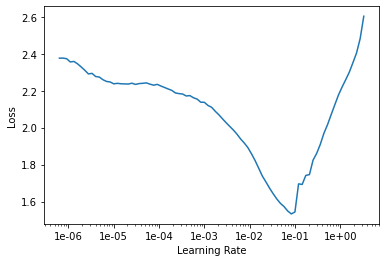

In [565]:
learn.recorder.plot()

In [566]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.046089,0.102838,0.435711,01:41
1,0.046880,0.117097,0.415741,01:21
2,0.041517,0.092943,0.486584,01:21
3,0.028808,0.097407,0.431858,01:21
4,0.020334,0.107486,0.428099,01:21


In [568]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


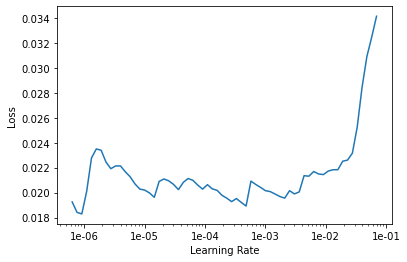

In [569]:
learn.recorder.plot()

In [570]:
learn.fit_one_cycle(5, 5e-4, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.022943,0.128644,0.419885,02:32
1,0.019920,0.130448,0.413875,02:38
2,0.016525,0.104094,0.432517,02:39
3,0.012607,0.125445,0.418125,02:35
4,0.011929,0.137779,0.416723,02:31


In [562]:
### Still Overfitting.. Reduce overfitting should be the target

In [573]:
learn.fit_one_cycle(5, 5e-4, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.016620,0.133132,0.410193,01:38
1,0.020540,0.113436,0.416674,01:39
2,0.014037,0.096676,0.435093,01:39
3,0.011931,0.154421,0.416183,01:17
4,0.010524,0.152389,0.415967,01:16


In [454]:
learn.fit_one_cycle(5, 1e-5, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.017547,0.106650,0.425819,01:21
1,0.018567,0.108021,0.425793,01:21
2,0.017696,0.112761,0.420049,02:38
3,0.017243,0.108688,0.424260,01:55
4,0.017335,0.120652,0.413114,02:24


In [437]:
test_df

,Day_No,index,ID,Course_ID,Course_Domain,Course_Type,User_Traffic,Competition_Metric,After_Public_Holiday,Before_Public_Holiday,...,Before_Short_Promotion,After_Long_Promotion,Before_Long_Promotion,Short_Promotion_bw,Public_Holiday_bw,Long_Promotion_bw,Short_Promotion_fw,Public_Holiday_fw,Long_Promotion_fw,week_day
882,883,0,883,1,Development,Course,NaN,0.007,8,883,...,0,0,0,2.0,0.0,7.0,4.0,0.0,7.0,1
883,884,1,884,1,Development,Course,NaN,0.007,9,884,...,0,0,0,3.0,0.0,7.0,3.0,0.0,7.0,2
884,885,2,885,1,Development,Course,NaN,0.007,10,885,...,0,0,0,4.0,0.0,7.0,2.0,0.0,7.0,3
885,886,3,886,1,Development,Course,NaN,0.007,11,886,...,0,0,0,5.0,0.0,7.0,1.0,0.0,7.0,4
886,887,4,887,1,Development,Course,NaN,0.007,12,887,...,-9,0,0,5.0,0.0,7.0,0.0,0.0,7.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548082,938,35995,548083,600,Software Marketing,Program,NaN,0.070,53,938,...,0,0,0,1.0,0.0,7.0,5.0,0.0,5.0,0
548083,939,35996,548084,600,Software Marketing,Program,NaN,0.070,54,939,...,0,0,0,2.0,0.0,7.0,4.0,0.0,4.0,1
548084,940,35997,548085,600,Software Marketing,Program,NaN,0.070,55,940,...,0,0,0,3.0,0.0,7.0,3.0,0.0,3.0,2
548085,941,35998,548086,600,Software Marketing,Program,NaN,0.070,56,941,...,0,0,0,4.0,0.0,7.0,2.0,0.0,2.0,3


In [538]:
test_preds = learn.get_preds(DatasetType.Test)

In [547]:
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0] - 2

In [548]:
test_df["Sales"] = test_df["Sales"] 

In [549]:
sub_df = test_df.copy()

In [550]:
sub_df.index = sub_df.index + 1

In [551]:
sub_df = sub_df["Sales"]

In [552]:
out = pd.DataFrame(sub_df).reset_index()

In [553]:
out.columns = ["ID","Sales"]

In [554]:
out.to_csv(output_path+"submission.csv", index = False)